In [ ]:
from google.colab import files
upload = files.upload()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
def scaling(minimum, maximum):
  factor = 255/(maximum - minimum)
  return factor

In [ ]:
def normal_test(i):
    xmin = 9999
    ymin = 9999
    zmin = 9999
    xmax = -999
    ymax = -999
    zmax = -999
    j = 0
    while j < len(i):
        if i[j] > xmax:
            xmax = i[j]
        if i[j] < xmin:
            xmin = i[j]
        if i[j+1] > ymax:
            ymax = i[j+1]
        if i[j+1] < ymin:
            ymin = i[j+1]
        if i[j+2] > zmax:
            zmax = i[j+2]
        if i[j+2] < zmin:
            zmin = i[j+2]
        j = j+3


    factor_x = scaling(xmin,xmax)
    factor_y = scaling(ymin,ymax)
    factor_z = scaling(zmin,zmax) 

    j = 0    
    while j < len(i):
        i[j] = i[j] - xmin
        i[j+1] -= ymin
        i[j+2] -= zmin
        j = j+3
   
    j = 0
    while j < len(i):
      i[j] = i[j] * factor_x
      i[j+1] *= factor_y
      i[j+2] *= factor_z
      j = j+3
    
    return i  

In [ ]:
def shift(i):
    xmin = 9999
    ymin = 9999
    zmin = 9999
    xmax = -999
    ymax = -999
    zmax = -999
    j = 0
    while j < len(i):
        if i[j] > xmax:
            xmax = i[j]
        if i[j] < xmin:
            xmin = i[j]
        if i[j+1] > ymax:
            ymax = i[j+1]
        if i[j+1] < ymin:
            ymin = i[j+1]
        if i[j+2] > zmax:
            zmax = i[j+2]
        if i[j+2] < zmin:
            zmin = i[j+2]
        j = j+3

    j = 0
    while j < len(i):
        i[j] = i[j] - xmin
        i[j+1] -= ymin
        i[j+2] -= zmin
        j = j+3
    return i  

In [ ]:
def scale(i):
    xmin = 9999
    ymin = 9999
    zmin = 9999
    xmax = -999
    ymax = -999
    zmax = -999
    j = 0
    while j < len(i):
        if i[j] > xmax:
            xmax = i[j]
        if i[j] < xmin:
            xmin = i[j]
        if i[j+1] > ymax:
            ymax = i[j+1]
        if i[j+1] < ymin:
            ymin = i[j+1]
        if i[j+2] > zmax:
            zmax = i[j+2]
        if i[j+2] < zmin:
            zmin = i[j+2]
        j = j+3

    
    j = 0

    factor_x = scaling(xmin,xmax)
    factor_y = scaling(ymin,ymax)
    factor_z = scaling(zmin,zmax)    
    while j < len(i):
      i[j] = i[j] * factor_x
      i[j+1] *= factor_y
      i[j+2] *= factor_z
      j = j+3    
    return i  

In [ ]:
def knn(xtrain, xtest, ytrain, ytest):
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn import metrics
  k_range = range(1,50)
  max = 0
  index = 0
  scores = {}
  scores_list = []
  for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k, algorithm = 'auto')
    neigh.fit(xtrain,ytrain)
    y_pred = neigh.predict(xtest)
    scores[k] = metrics.accuracy_score(ytest, y_pred)
    scores_list.append(metrics.accuracy_score(ytest, y_pred))
    if scores[k] > max:
        max = scores[k]
        index = k
  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.plot(k_range, scores_list) 
  print(max)
  print(index)
  neigh = KNeighborsClassifier(n_neighbors=index, algorithm = 'auto')
  neigh.fit(xtrain,ytrain)
  y_pred = neigh.predict(xtest)  
  print(metrics.accuracy_score(ytest, y_pred))   
  temp = confusion_matrix(ytest, y_pred)
  print(temp)

In [ ]:
def randomforest(xtrain, xtest, ytrain, ytest):
  from sklearn.ensemble import RandomForestClassifier
  from sklearn import metrics
  k_range = range(1,200)
  max = 0
  index = 0
  scores = {}
  scores_list = []
  for k in k_range:
    neigh = RandomForestClassifier(n_estimators=k, random_state = 42)
    neigh.fit(xtrain,ytrain)
    y_pred = neigh.predict(xtest)
    scores[k] = metrics.accuracy_score(ytest, y_pred)
    scores_list.append(metrics.accuracy_score(ytest, y_pred))
    if scores[k] > max:
        max = scores[k]
        index = k
  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.plot(k_range, scores_list) 
  print(max)
  print(index) 
  neigh = RandomForestClassifier(n_estimators = index, random_state = 42)
  neigh.fit(xtrain,ytrain)
  y_pred = neigh.predict(xtest)     
  print(metrics.accuracy_score(ytest,y_pred))
  temp = confusion_matrix(ytest, y_pred)
  print(temp)    

In [ ]:
def ann(xtrain, xtest, ytrain, ytest):
  from numpy.random import seed
  seed(42)
  from keras.models import Sequential
  from keras.layers import Dense
  import matplotlib.pyplot as plt
  import tensorflow as tf
  mark = []
  for item in ytrain:
      mark.append(ord(item))
  mark = pd.Series(mark)
  for i in range(len(mark)):
      mark[i] = mark[i] - 65
  ytrain = tf.keras.utils.to_categorical(mark,dtype = 'int32')
  mark = []
  for item in ytest:
      mark.append(ord(item))
  mark = pd.Series(mark)
  for i in range(len(mark)):
      mark[i] = mark[i] - 65
  ytest = tf.keras.utils.to_categorical(mark,dtype = 'int32')
  
  
  model = Sequential()
  model.add(Dense(256, input_dim = 63, activation = 'relu'))
  model.add(Dense(256, activation = 'relu'))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(25, activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  t = model.fit(xtrain, ytrain, epochs = 128, verbose = 1)
  plt.plot(t.history['loss'])
  plt.show()
  plt.plot(t.history['accuracy'])
  plt.show()
  _, accuracy = model.evaluate(xtest, ytest)
  print(accuracy)
  ypred = model.predict(xtest)
  print(confusion_matrix(np.argmax(ytest, axis = 1), np.argmax(ypred, axis = 1)))

In [ ]:
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)

BRUTE

0.7083333333333334
1
0.7083333333333334
[[19  0  0  0  0  0  0  0  0  0  0  1  2  0  0  0  0  0  2  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 15  0  0  0  0  0  0  0  0  0  1  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  1  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  2  3  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  3  0  0  0  0  0  0  2  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 16  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  1  0  0  0  1  0  1  2  2  0  1  0]
 [ 1  0  0  1  0  0  0  0  0  0 21  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  1  1  1  0  0  0  0  1  0 10  5  0  0  0  0  3  1  0  0  0  0  0]
 [ 6  0  0  0  2  0  0  0  1  0  0  2  7  0  0  0  0  3  2  

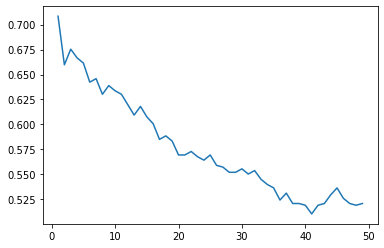

In [ ]:
knn(xtrain,xtest,ytrain,ytest)

0.7743055555555556
109
0.7743055555555556
[[17  0  0  0  0  0  0  0  0  1  0  2  0  0  0  0  0  2  2  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  6  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  1  1  1  3  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0 17  4  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 19  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0 19  0  0  0  1  0  0  0  0  2  0  1  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  2 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  1  0 17  2  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  1  1  0  7 13  0  0  0  0  1  0

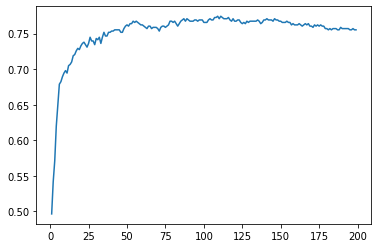

In [ ]:
randomforest(xtrain, xtest, ytrain, ytest)

Epoch 1/128
2304/2304 [==============================] - 1s 318us/step - loss: 3.2713 - accuracy: 0.0599
Epoch 2/128
2304/2304 [==============================] - 1s 218us/step - loss: 2.4690 - accuracy: 0.2109
Epoch 3/128
2304/2304 [==============================] - 0s 217us/step - loss: 1.6494 - accuracy: 0.3971
Epoch 4/128
2304/2304 [==============================] - 1s 220us/step - loss: 1.2255 - accuracy: 0.5330
Epoch 5/128
2304/2304 [==============================] - 0s 216us/step - loss: 1.1229 - accuracy: 0.5747
Epoch 6/128
2304/2304 [==============================] - 1s 224us/step - loss: 0.9999 - accuracy: 0.6359
Epoch 7/128
2304/2304 [==============================] - 1s 233us/step - loss: 0.8589 - accuracy: 0.6836
Epoch 8/128
2304/2304 [==============================] - 1s 219us/step - loss: 0.8759 - accuracy: 0.6749
Epoch 9/128
2304/2304 [==============================] - 0s 212us/step - loss: 0.7973 - accuracy: 0.6940
Epoch 10/128
2304/2304 [==============================]

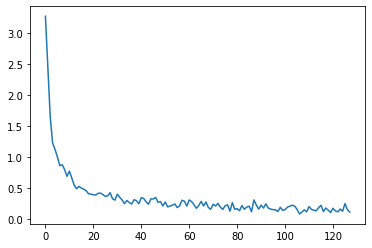

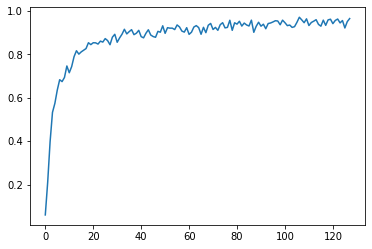

576/576 [==============================] - 0s 157us/step
0.8784722089767456
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 20  1  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0  0 16  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
ann(xtrain,xtest,ytrain,ytest)

In [ ]:
ytrain.tail()

2299    Y
2300    Y
2301    Y
2302    Y
2303    Y
Name: Symbol, dtype: object

In [ ]:
ytest.tail()

2875    Y
2876    Y
2877    Y
2878    Y
2879    Y
Name: Symbol, dtype: object

SHIFTING

In [ ]:
def shifting(xtrain,xtest, ytrain, ytest):
  for k in range(0,2304):
    p = shift(xtrain.iloc[k,:])
    xtrain.iloc[k,:] = p  
  for k in range(0,576):
    p = shift(xtest.iloc[k,:])
    xtest.iloc[k,:] = p 
  knn(xtrain, xtest, ytrain, ytest)
  randomforest(xtrain, xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)           

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.9097222222222222
1
0.9097222222222222
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 19  2  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  2  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 20  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5 18  0  0  0  0  1  0  

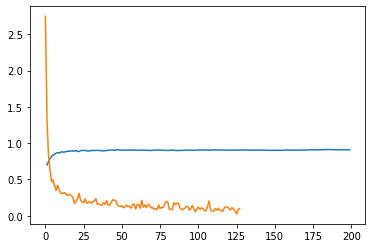

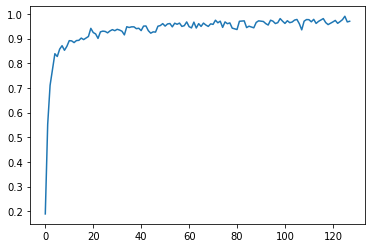

576/576 [==============================] - 0s 148us/step
0.9392361044883728
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0 23  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 21  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
shifting(xtrain, xtest, ytrain, ytest)

SCALING

In [ ]:
xtrain.head()

,P1X,P1Y,P1Z,P2X,P2Y,P2Z,P3X,P3Y,P3Z,P4X,P4Y,P4Z,P5X,P5Y,P5Z,P6X,P6Y,P6Z,P7X,P7Y,P7Z,P8X,P8Y,P8Z,P9X,P9Y,P9Z,P10X,P10Y,P10Z,P11X,P11Y,P11Z,P12X,P12Y,P12Z,P13X,P13Y,P13Z,P14X,P14Y,P14Z,P15X,P15Y,P15Z,P16X,P16Y,P16Z,P17X,P17Y,P17Z,P18X,P18Y,P18Z,P19X,P19Y,P19Z,P20X,P20Y,P20Z,P21X,P21Y,P21Z
0,44.497776,64.676225,47.948233,22.501119,56.102914,35.567568,7.718897,38.341528,28.527074,2.164708,17.540481,21.744696,3.510800,2.132610,16.258864,19.745687,16.524253,46.395372,18.928699,0.000000,29.312732,21.383959,14.742605,21.469777,23.773390,24.120995,23.220183,33.024525,16.663772,48.417361,35.256112,0.898610,28.160378,35.283072,22.643988,23.718789,35.300443,31.702537,29.301553,46.552108,18.363860,47.526454,49.491691,4.660244,29.217881,47.632007,25.550616,26.594884,47.437813,34.205081,31.817859,60.611250,20.986369,45.947592,62.511517,10.290744,34.859853,59.002143,23.270081,35.493052,57.294058,30.921608,41.392367
1,50.863545,81.347079,51.776572,29.632314,69.087065,44.041889,16.020600,44.647728,38.962361,11.050336,20.466072,33.662323,7.762546,0.000000,29.225214,30.951903,22.130250,52.121865,27.129764,8.198078,38.633853,26.111066,26.737391,34.457182,28.303572,35.747559,37.127054,44.479637,23.846388,51.393011,41.061668,12.476828,35.102152,37.942683,37.264909,32.262186,40.452291,43.653063,35.756733,58.608011,27.576439,48.053441,55.484571,17.763256,33.033917,50.972305,40.731588,31.649798,53.491370,46.841477,35.682760,73.584533,33.493779,44.156789,68.816526,24.342145,34.814915,62.898117,39.323645,35.364857,64.524949,45.332929,39.399064
2,60.734201,68.619951,45.240820,39.840439,58.732779,38.101294,23.568804,37.189430,34.314116,13.081796,17.907569,29.438460,0.000000,4.292527,25.108535,30.440584,14.452543,46.070608,29.762413,2.210248,33.512698,30.765773,11.093431,32.455092,30.587707,12.505665,36.384944,43.155930,14.635938,44.872554,42.486391,7.419066,27.875822,44.283859,28.486065,26.756978,44.534959,32.392711,33.150116,56.872835,16.834348,41.181799,56.018538,10.952429,24.759592,55.844166,31.353920,25.201797,56.430212,35.089472,31.896755,70.830199,20.583041,37.208841,68.559077,15.537589,25.570409,65.294465,29.209792,26.975639,65.350452,32.392184,33.774609
3,55.019199,68.019502,40.761597,33.687149,56.368461,33.774968,18.776391,35.099449,30.758992,9.342615,15.295375,26.261606,0.958552,1.444205,22.258687,28.134637,13.713012,45.760815,24.107453,0.000000,33.701181,23.179709,6.158302,29.854428,22.370639,8.295902,30.944585,40.471370,13.804021,44.421625,36.009974,3.018335,27.407554,35.873339,22.822644,23.383807,36.748592,29.325409,27.552194,53.654825,15.910456,40.560738,50.050071,6.597827,24.695851,48.271333,26.182405,22.896642,49.226027,32.620312,27.669701,67.060950,20.029127,36.318342,63.753924,12.125180,24.723363,59.021428,24.731586,24.897245,58.601424,30.097638,30.393264
4,55.802439,69.252516,33.789895,30.212646,58.594466,29.994775,14.317060,41.883826,28.959830,7.092282,21.642543,26.293158,6.331700,6.657340,24.869043,23.687050,20.945285,45.489593,16.822006,1.975292,35.455760,19.989174,11.334289,31.162700,23.857329,16.891861,33.028111,35.493861,19.005589,44.348539,29.921262,0.000000,29.327850,30.958630,18.929642,24.943746,33.345428,26.431980,29.609561,48.503791,18.399777,40.885922,44.505188,1.566904,26.853955,44.193710,21.766209,23.762923,46.758843,30.336209,28.243484,62.920816,19.220193,37.322594,59.345454,5.723180,28.914355,55.467896,18.059701,28.875913,55.257941,25.593321,33.923957


In [ ]:
def sc(xtrain, xtest, ytrain, ytest):
  for k in range(0,2304):
    p = scale(xtrain.iloc[k,:])
    xtrain.iloc[k,:] = p  
  for k in range(0,576):
    p = scale(xtest.iloc[k,:])
    xtest.iloc[k,:] = p    
  knn(xtrain, xtest, ytrain, ytest)
  randomforest(xtrain, xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)             

         P1X        P1Y        P1Z  ...       P21X       P21Y       P21Z
0  44.497776  64.676225  47.948233  ...  57.294058  30.921608  41.392367
1  50.863545  81.347079  51.776572  ...  64.524949  45.332929  39.399064
2  60.734201  68.619951  45.240820  ...  65.350452  32.392184  33.774609
3  55.019199  68.019502  40.761597  ...  58.601424  30.097638  30.393264
4  55.802439  69.252516  33.789895  ...  55.257941  25.593321  33.923957

[5 rows x 63 columns]
          P1X         P1Y       P1Z  ...        P21X        P21Y       P21Z
0  170.183743   74.891959 -0.000389  ...  182.980026   41.137341  -6.556256
1   79.995048  121.969880 -0.000288  ...   93.656453   85.955729 -12.377795
2   97.084699  137.187029 -0.000710  ...  101.700949  100.959262 -11.466922
3   96.452626  104.742117 -0.000901  ...  100.034851   66.820253 -10.369234
4   80.830179  186.542242 -0.000632  ...   80.285681  142.883047   0.133429

[5 rows x 63 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.6909722222222222
1
0.6909722222222222
[[16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  1  4  0  0  0  1  0]
 [ 0 21  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 19  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  1 16  0  0  0  0  0  0  0  5  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  1  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 18  1  0  0  0  1  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5 18  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 20  0  0  0  0  0  0  0  0  0  1  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  1  1  2  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0 19  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 2  0  0  1  4  0  0  0  1  0  0 13  1  0  0  0  0  2  0  0  0  0  0  0]
 [ 3  0  0  0  1  0  0  0  1  0  0  3  8  0  0  0  0  3  3  

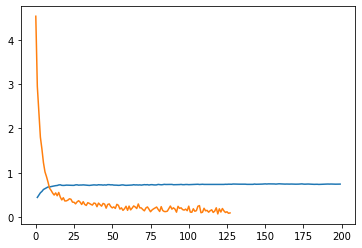

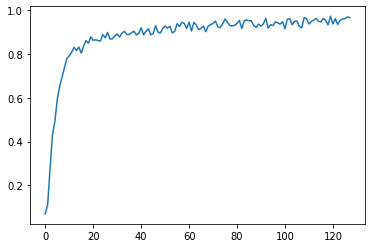

576/576 [==============================] - 0s 155us/step
0.9045138955116272
[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  4  0  0  0  0  0]
 [ 0 23  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 21  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
print(xtrain.head())
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
print(xtrain.head())
sc(xtrain, xtest, ytrain, ytest)

ROUNDING

In [ ]:
def r(xtrain, xtest, ytrain, ytest):
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304, 2880):
        xtest[i][j] = round(xtest[i][j], 3)  
  knn(xtrain, xtest, ytrain, ytest)
  randomforest(xtrain, xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)      

          P1X         P1Y       P1Z  ...        P21X        P21Y       P21Z
0  670.986197  295.277738 -0.001534  ...  721.438306  162.192861 -25.849456
1  250.761766  382.340948 -0.000902  ...  293.586392  269.446810 -38.800874
2  349.520381  493.895158 -0.002558  ...  366.139617  363.469427 -41.282745
3  361.593645  392.670324 -0.003378  ...  375.023139  250.504105 -38.873479
4  297.631000  686.881493 -0.002327  ...  295.626061  526.120621   0.491311

[5 rows x 63 columns]
          P1X         P1Y       P1Z  ...        P21X        P21Y       P21Z
0  170.183743   74.891959 -0.000389  ...  182.980026   41.137341  -6.556256
1   79.995048  121.969880 -0.000288  ...   93.656453   85.955729 -12.377795
2   97.084699  137.187029 -0.000710  ...  101.700949  100.959262 -11.466922
3   96.452626  104.742117 -0.000901  ...  100.034851   66.820253 -10.369234
4   80.830179  186.542242 -0.000632  ...   80.285681  142.883047   0.133429

[5 rows x 63 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.7083333333333334
1
0.7083333333333334
[[19  0  0  0  0  0  0  0  0  0  0  1  2  0  0  0  0  0  2  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 15  0  0  0  0  0  0  0  0  0  1  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  1  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  2  3  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 17  3  0  0  0  0  0  0  2  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3 16  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  1  0  0  0  1  0  1  2  2  0  1  0]
 [ 1  0  0  1  0  0  0  0  0  0 21  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  1  1  1  0  0  0  0  1  0 10  5  0  0  0  0  3  1  0  0  0  0  0]
 [ 6  0  0  0  2  0  0  0  1  0  0  2  7  0  0  0  0  3  2  

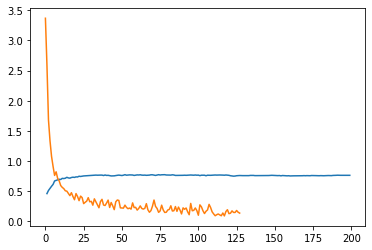

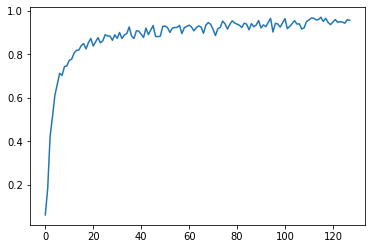

576/576 [==============================] - 0s 136us/step
0.8819444179534912
[[11  0  0  0  0  0  0  0  0  0  0  1  6  0  0  0  0  1  5  0  0  0  0  0]
 [ 0 23  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  2  0  1  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  1  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0 20  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
print(xtrain.head())
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
print(xtrain.head())
r(xtrain, xtest, ytrain, ytest)

SHIFT + SCALE

In [ ]:
def shift_scale(xtrain, xtest, ytrain, ytest):
  for k in range(0,2304):
    p = normal_test(xtrain.iloc[k,:])
    xtrain.iloc[k,:] = p  
  for k in range(0,576):
    p = normal_test(xtest.iloc[k,:])
    xtest.iloc[k,:] = p   
  knn(xtrain,xtest,ytrain,ytest)
  randomforest(xtrain,xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)       

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0.9322916666666666
1
0.9322916666666666
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 21  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 19  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5 18  0  0  0  0  1  0  

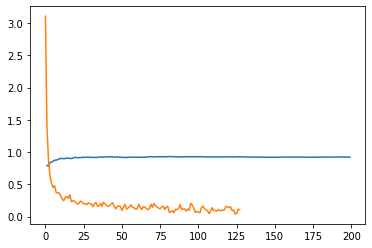

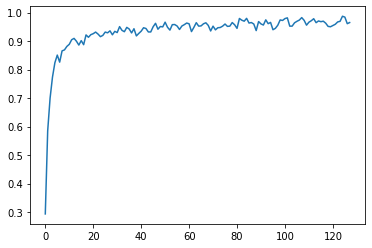

576/576 [==============================] - 0s 138us/step
0.9236111044883728
[[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0 23  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  1  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  2 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  4  0  0  0  0  0  0 16  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
shift_scale(xtrain, xtest, ytrain, ytest)

SCALE ROUND

In [ ]:
def scale_round(xtrain, xtest, ytrain, ytest):
  for k in range(0,2304):
    p = scale(xtrain.iloc[k,:])
    xtrain.iloc[k,:] = p  
  for k in range(0,576):
    p = scale(xtest.iloc[k,:])
    xtest.iloc[k,:] = p 
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304, 2880):
        xtest[i][j] = round(xtest[i][j], 3)  
  knn(xtrain,xtest,ytrain,ytest)
  randomforest(xtrain,xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)       

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/li

0.6909722222222222
1
0.6909722222222222
[[16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  1  4  0  0  0  1  0]
 [ 0 21  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 19  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  1 16  0  0  0  0  0  0  0  5  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  1  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 18  1  0  0  0  1  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5 18  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 20  0  0  0  0  0  0  0  0  0  1  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  1  1  2  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0 19  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 2  0  0  1  4  0  0  0  1  0  0 13  1  0  0  0  0  2  0  0  0  0  0  0]
 [ 3  0  0  0  1  0  0  0  1  0  0  3  8  0  0  0  0  3  3  

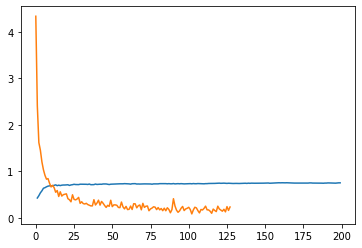

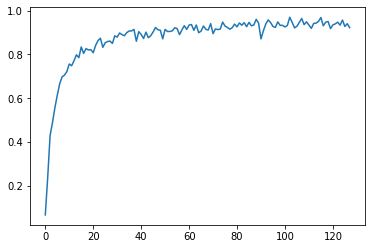

576/576 [==============================] - 0s 158us/step
0.8888888955116272
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  1  0  1  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0 17  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
scale_round(xtrain, xtest, ytrain, ytest)

ROUND SCALE

In [ ]:
def round_scale(xtrain, xtest, ytrain, ytest):
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304,2880):
        xtest[i][j] = round(xtest[i][j], 3)  
  for k in range(0,2304):
    p = scale(xtrain.iloc[k,:])
    xtrain.iloc[k,:] = p  
  for k in range(0,576):
    p = scale(xtest.iloc[k,:])
    xtest.iloc[k,:] = p   
  knn(xtrain,xtest,ytrain,ytest)
  randomforest(xtrain,xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/loc

0.6909722222222222
1
0.6909722222222222
[[16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  1  4  0  0  0  1  0]
 [ 0 21  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 19  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  1 16  0  0  0  0  0  0  0  5  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  1  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 18  1  0  0  0  1  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5 18  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 20  0  0  0  0  0  0  0  0  0  1  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  1  1  2  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0 19  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 2  0  0  1  4  0  0  0  1  0  0 13  1  0  0  0  0  2  0  0  0  0  0  0]
 [ 3  0  0  0  1  0  0  0  1  0  0  3  8  0  0  0  0  3  3  

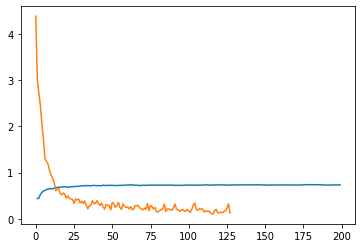

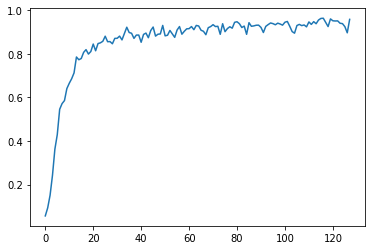

576/576 [==============================] - 0s 146us/step
0.90625
[[23  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 21  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 22  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0 15  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 

In [ ]:
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
round_scale(xtrain, xtest, ytrain, ytest)

SHIFT ROUND

In [ ]:
def shift_round(xtrain, xtest, ytrain, ytest):
  for k in range(0,2304):
    p = shift(xtrain.iloc[k,:])
    xtrain.iloc[k,:] = p  
  for k in range(0,576):
    p = shift(xtest.iloc[k,:])
    xtest.iloc[k,:] = p 
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304,2880):
        xtest[i][j] = round(xtest[i][j], 3)    
  knn(xtrain, xtest, ytrain, ytest)
  randomforest(xtrain, xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)      

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/li

0.9097222222222222
1
0.9097222222222222
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 19  2  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  2  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 20  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5 18  0  0  0  0  1  0  

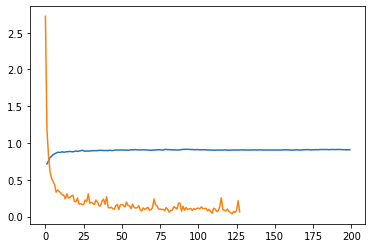

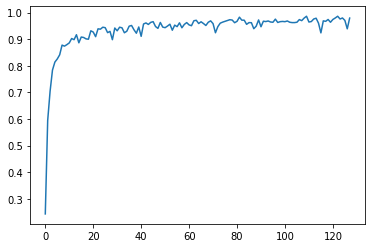

576/576 [==============================] - 0s 134us/step
0.9427083134651184
[[23  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 21  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 21  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
shift_round(xtrain, xtest, ytrain, ytest)

ROUND SHIFT

In [ ]:
def round_shift(xtrain, xtest, ytrain, ytest):
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304,2880):
        xtest[i][j] = round(xtest[i][j], 3) 
  for k in range(0,2304):
    p = shift(xtrain.iloc[k,:])
    xtrain.iloc[k,:] = p  
  for k in range(0,576):
    p = shift(xtest.iloc[k,:])
    xtest.iloc[k,:] = p          
  knn(xtrain, xtest, ytrain, ytest)
  randomforest(xtrain, xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/loc

0.9097222222222222
1
0.9097222222222222
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 19  2  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  2  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 20  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5 18  0  0  0  0  1  0  

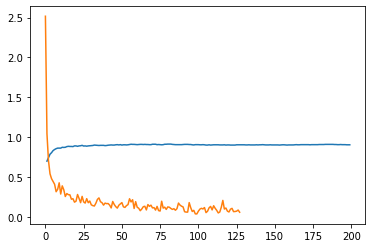

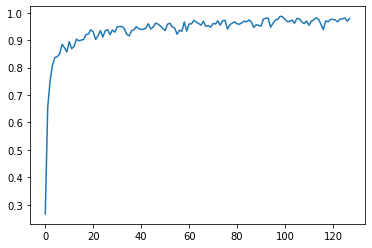

576/576 [==============================] - 0s 142us/step
0.9392361044883728
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 21  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
round_shift(xtrain, xtest, ytrain, ytest)

ROUND SHIFT SCALE

In [ ]:
def round_shift_scale(xtrain, xtest, ytrain, ytest):
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304,2880):
        xtest[i][j] = round(xtest[i][j], 3)      
  for k in range(0,2304):
    p = normal_test(xtrain.iloc[k,:])
    xtrain.iloc[k,:] = p  
  for k in range(0,576):
    p = normal_test(xtest.iloc[k,:])
    xtest.iloc[k,:] = p   
  knn(xtrain,xtest,ytrain,ytest)
  randomforest(xtrain,xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/loc

0.9322916666666666
1
0.9322916666666666
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 21  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 19  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5 18  0  0  0  0  1  0  

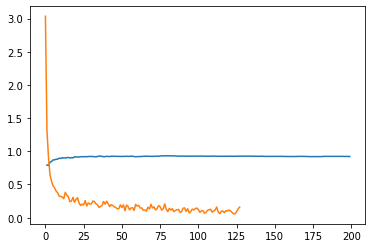

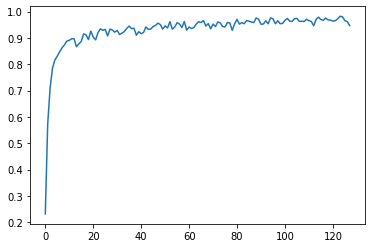

576/576 [==============================] - 0s 159us/step
0.8819444179534912
[[21  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 20  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 21  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  1  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0 15  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
round_shift_scale(xtrain,xtest,ytrain,ytest)

SHIFT SCALE ROUND

In [ ]:
def shift_scale_round(xtrain, xtest, ytrain, ytest):
  for k in range(0,2304):
    p = normal_test(xtrain.iloc[k,:])
    xtrain.iloc[k,:] = p  
  for k in range(0,576):
    p = normal_test(xtest.iloc[k,:])
    xtest.iloc[k,:] = p   
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304,2880):
        xtest[i][j] = round(xtest[i][j], 3)     
  knn(xtrain,xtest,ytrain,ytest)
  randomforest(xtrain,xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)      

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/li

0.9322916666666666
1
0.9322916666666666
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 21  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 19  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5 18  0  0  0  0  1  0  

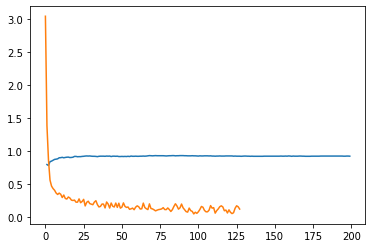

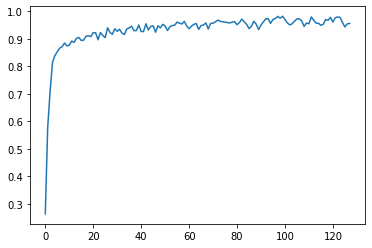

576/576 [==============================] - 0s 150us/step
0.9131944179534912
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 20  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 23  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
shift_scale_round(xtrain, xtest, ytrain, ytest)

ROUND SCALE ROUND

In [ ]:
def round_scale_round(xtrain, xtest, ytrain, ytest):
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304,2880):
        xtest[i][j] = round(xtest[i][j], 3)  
  for k in range(0,2304):
    p = scale(xtrain.iloc[k,:])
    xtrain.iloc[k,:] = p  
  for k in range(0,576):
    p = scale(xtest.iloc[k,:])
    xtest.iloc[k,:] = p   
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304,2880):
        xtest[i][j] = round(xtest[i][j], 3)   
  knn(xtrain,xtest,ytrain,ytest)
  randomforest(xtrain,xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/loc

0.6909722222222222
1
0.6909722222222222
[[16  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  1  4  0  0  0  1  0]
 [ 0 21  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 19  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  1 16  0  0  0  0  0  0  0  5  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  1  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 18  1  0  0  0  1  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5 18  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 20  0  0  0  0  0  0  0  0  0  1  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  1  1  2  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0 19  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 2  0  0  1  4  0  0  0  1  0  0 13  1  0  0  0  0  2  0  0  0  0  0  0]
 [ 3  0  0  0  1  0  0  0  1  0  0  3  8  0  0  0  0  3  3  

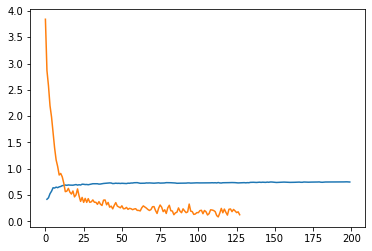

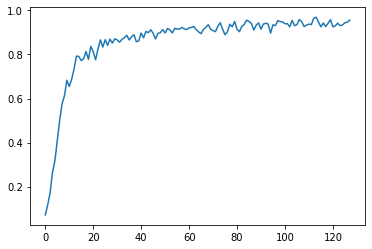

576/576 [==============================] - 0s 149us/step
0.8819444179534912
[[22  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  5  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0 21  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5 12  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
round_scale_round(xtrain, xtest, ytrain, ytest)

ROUND SHIFT ROUND

In [ ]:
def round_shift_round(xtrain, xtest, ytrain, ytest):
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304,2880):
        xtest[i][j] = round(xtest[i][j], 3) 
  for k in range(0,2304):
    p = shift(xtrain.iloc[k,:])
    xtrain.iloc[k,:] = p  
  for k in range(0,576):
    p = shift(xtest.iloc[k,:])
    xtest.iloc[k,:] = p       
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304,2880):
        xtest[i][j] = round(xtest[i][j], 3)   
  knn(xtrain,xtest,ytrain,ytest)
  randomforest(xtrain,xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)     


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/loc

0.9097222222222222
1
0.9097222222222222
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 19  2  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  2  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 20  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5 18  0  0  0  0  1  0  

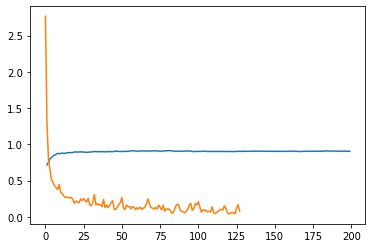

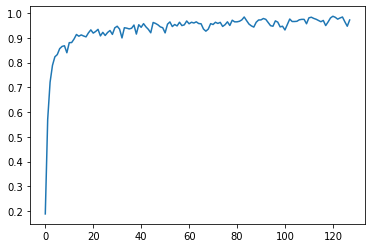

576/576 [==============================] - 0s 151us/step
0.9305555820465088
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0 23  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0 21  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0 16  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
round_shift_round(xtrain, xtest, ytrain, ytest)

ROUND SHIFT SCALE ROUND

In [ ]:
def round_shift_scale_round(xtrain, xtest, ytrain, ytest):
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304,2880):
        xtest[i][j] = round(xtest[i][j], 3)      
  for k in range(0,2304):
    p = normal_test(xtrain.iloc[k,:])
    xtrain.iloc[k,:] = p  
  for k in range(0,576):
    p = normal_test(xtest.iloc[k,:])
    xtest.iloc[k,:] = p   
  for i in xtrain.columns:
    for j in range(0, 2304):
        xtrain[i][j] = round(xtrain[i][j], 3)
  for i in xtest.columns:
    for j in range(2304, 2880):
        xtest[i][j] = round(xtest[i][j], 3)     
  knn(xtrain,xtest,ytrain,ytest)
  randomforest(xtrain,xtest, ytrain, ytest)
  ann(xtrain, xtest, ytrain, ytest)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/loc

0.9322916666666666
1
0.9322916666666666
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 21  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 19  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5 18  0  0  0  0  1  0  

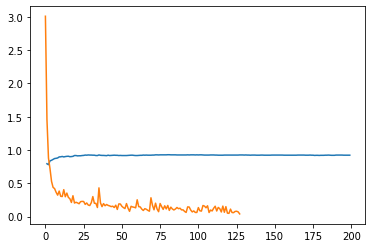

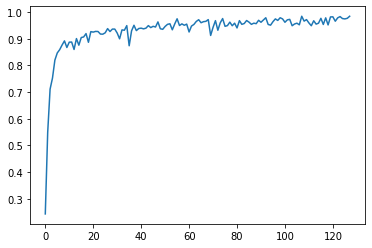

576/576 [==============================] - 0s 136us/step
0.9357638955116272
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0 21  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [ ]:
temp = pd.read_csv("/content/final.csv")
label = temp.Symbol
temp = temp.drop(['Symbol'],axis =1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(temp,label,test_size = 0.2,shuffle = False)
round_shift_scale_round(xtrain,xtest, ytrain, ytest)